In [139]:
# Python program to generate word vectors using Word2Vec 
# importing all necessary modules 
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
from matplotlib import pyplot as plt
warnings.filterwarnings(action = 'ignore') 

In [140]:
import gensim 
from gensim.models import Word2Vec
import os 
from google.colab import drive

In [141]:
#  Reads ‘alice.txt’ file 

drive.mount('/content/gdrive') 
#FILE=open('/content/gdrive/My Drive/Colab Notebooks/Lab2/H0.txt', 'r')               
#sample = os.path.join("", '/content/gdrive/My Drive/Colab Notebooks/Lab2/"BraudeCollege_0.txt"')
sample = open("/content/gdrive/My Drive/Colab Notebooks/Lab2/BraudeCollege_0.txt", "r") 
s = sample.read() 
#print(s)
# Replaces escape character with space 
f = s.replace("\n", " ")
f.strip()
str=f.split()
f=" ".join(str)
#print(f)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [142]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [143]:

# iterate through each sentence in the file 
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
  
    data.append(temp)


In [144]:
print(data)

[['ort', 'braude', 'academic', 'college', 'of', 'engineering', 'is', 'established', 'in', 'the', 'city', 'of', 'karmiel', ',', 'israel', '.'], ['the', 'ort', 'braude', 'academic', 'college', 'of', 'engineering', '(', 'obc', ')', 'in', 'karmiel', ',', 'is', 'named', 'after', 'max', 'braude', ',', 'chairman', 'of', 'world', 'ort', 'from', '1957', 'to', '1980', '.'], ['obc', ',', 'which', 'offers', 'b.sc', '.'], ['and', 'm.sc', '.'], ['degrees', 'in', 'engineering', ',', 'aims', 'to', 'bridge', 'socioeconomic', 'gaps', ',', 'and', 'advance', 'the', 'productivity', 'of', 'israeli', 'industry', '.'], ['the', 'college', 'operates', 'with', 'the', 'approval', 'of', 'the', 'council', 'for', 'higher', 'education', 'and', 'as', 'of', '2021', ',', 'its', 'student', 'body', 'numbers', 'over', '3,000', 'students', '.'], ['obc', 'confers', 'a', 'bachelor', 'of', 'science', '(', 'b.sc', '.', ')'], ['degree', 'in', 'these', 'fields', ':', 'applied', 'mathematics', ',', 'information', 'systems', 'engin

In [145]:
print(len(data))

54


In [146]:
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1, size = 20, window = 5) 
  
#Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 20, window = 5, sg = 1) 

[ 0.00888386  0.01506613 -0.01336231  0.00352213 -0.00898573 -0.00546772
 -0.01078052 -0.01932233 -0.00408748 -0.00602126  0.01866548 -0.0077284
 -0.00635701 -0.0096478   0.01379966  0.00753094  0.00522491 -0.02185787
 -0.00483599  0.00936502]


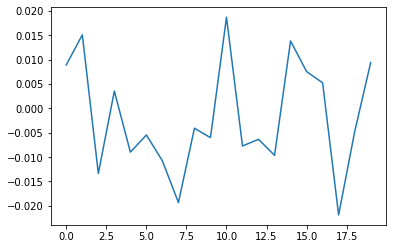

In [147]:
vector1 = model1.wv['braude'] 
word_vectors = model1.wv
print(word_vectors['braude'] )
plt.plot(word_vectors['braude'])
plt.show()

[ 0.01089592  0.00983811 -0.00806767  0.00338182  0.02048679 -0.00964846
  0.01591208 -0.02023747  0.01395023  0.00740714 -0.01553779 -0.00915139
 -0.03334782 -0.00182566 -0.00402503  0.00077922 -0.00344021 -0.02239534
 -0.01920928  0.00887315]


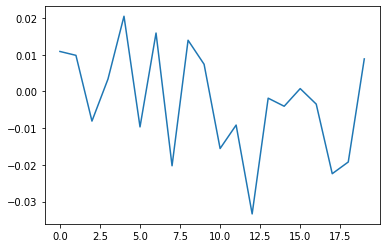

In [156]:
vector2 = model2.wv['academic'] 
word_vectors = model2.wv
print(word_vectors['academic'] )
plt.plot(word_vectors['academic'])
plt.show()

Difference


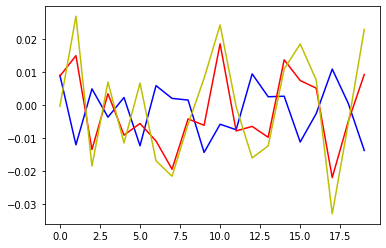

In [149]:
vec=model1.wv['braude'] -model2.wv['braude'] 
print('Difference' )
plt.plot(vec,'b')
plt.plot(model1.wv['braude'],'r')
plt.plot(model2.wv['braude'],'y')

plt.show()

In [150]:
w2v_vocabulary = list(model1.wv.vocab)
print(w2v_vocabulary)
w2v_vocabulary = list(model2.wv.vocab)
print(w2v_vocabulary)


['ort', 'braude', 'academic', 'college', 'of', 'engineering', 'is', 'established', 'in', 'the', 'city', 'karmiel', ',', 'israel', '.', '(', 'obc', ')', 'named', 'after', 'max', 'chairman', 'world', 'from', '1957', 'to', '1980', 'which', 'offers', 'b.sc', 'and', 'm.sc', 'degrees', 'aims', 'bridge', 'socioeconomic', 'gaps', 'advance', 'productivity', 'israeli', 'industry', 'operates', 'with', 'approval', 'council', 'for', 'higher', 'education', 'as', '2021', 'its', 'student', 'body', 'numbers', 'over', '3,000', 'students', 'confers', 'a', 'bachelor', 'science', 'degree', 'these', 'fields', ':', 'applied', 'mathematics', 'information', 'systems', 'biotechnology', 'mechanical', 'electrical', 'electronic', 'optical', 'industrial', 'management', 'software', 'master', 'also', 'educational', 'programs', 'pre-academic', 'studies', 'youth', 'center', 'enrichment', 'teacher', 'certification', 'technology', 'date', 'has', 'graduated', '8000', 'engineers', 'adding', 'diversity', 'local', 'populatio

In [159]:
print("Cosine similarity between 'braude' " + "and 'engineering' - Skip Gram : ", model2.similarity('braude', 'israel')) 
      
print("Cosine similarity between 'braude' " + "and 'israel' - Skip Gram : ", model2.similarity('braude', 'obc')) 
print("Cosine similarity between 'braude' " + "and 'engineering' - Skip Gram : ", model1.similarity('braude', 'israel')) 
      
print("Cosine similarity between 'braude' " + "and 'israel' - Skip Gram : ", model1.similarity('braude', 'obc')) 
model1.wv.similar_by_word("braude", topn=10)
model2.wv.similar_by_word("braude", topn=10)

Cosine similarity between 'braude' and 'engineering' - Skip Gram :  0.5648944
Cosine similarity between 'braude' and 'israel' - Skip Gram :  0.53454626
Cosine similarity between 'braude' and 'engineering' - Skip Gram :  0.28462914
Cosine similarity between 'braude' and 'israel' - Skip Gram :  0.2530676


[('this', 0.7767190933227539),
 ('the', 0.7241417169570923),
 ('to', 0.7072128057479858),
 ('colleges', 0.6896523833274841),
 ('in', 0.6825182437896729),
 ('.', 0.6620874404907227),
 ('year', 0.6412031650543213),
 ('a', 0.640520453453064),
 ('and', 0.6363270878791809),
 ('activities', 0.6342654824256897)]

In [152]:
w2c = dict()
for item in model1.wv.vocab:
   w2c[item]=model1.wv.vocab[item].count
w2cSorted=dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))
w2cSortedList = list(w2cSorted.keys())
print(w2cSortedList[-10:])

['research-based', 'conducted', 'eu', 'around', 'chosen', 'approved', 'by', 'vice-presidents', 'support', 'relations']


In [153]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

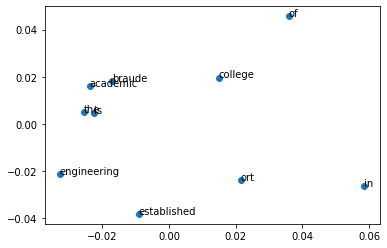

In [154]:
N=10
X = model1[model2.wv.vocab][-N:]

pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model1.wv.vocab)[:N]
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [160]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

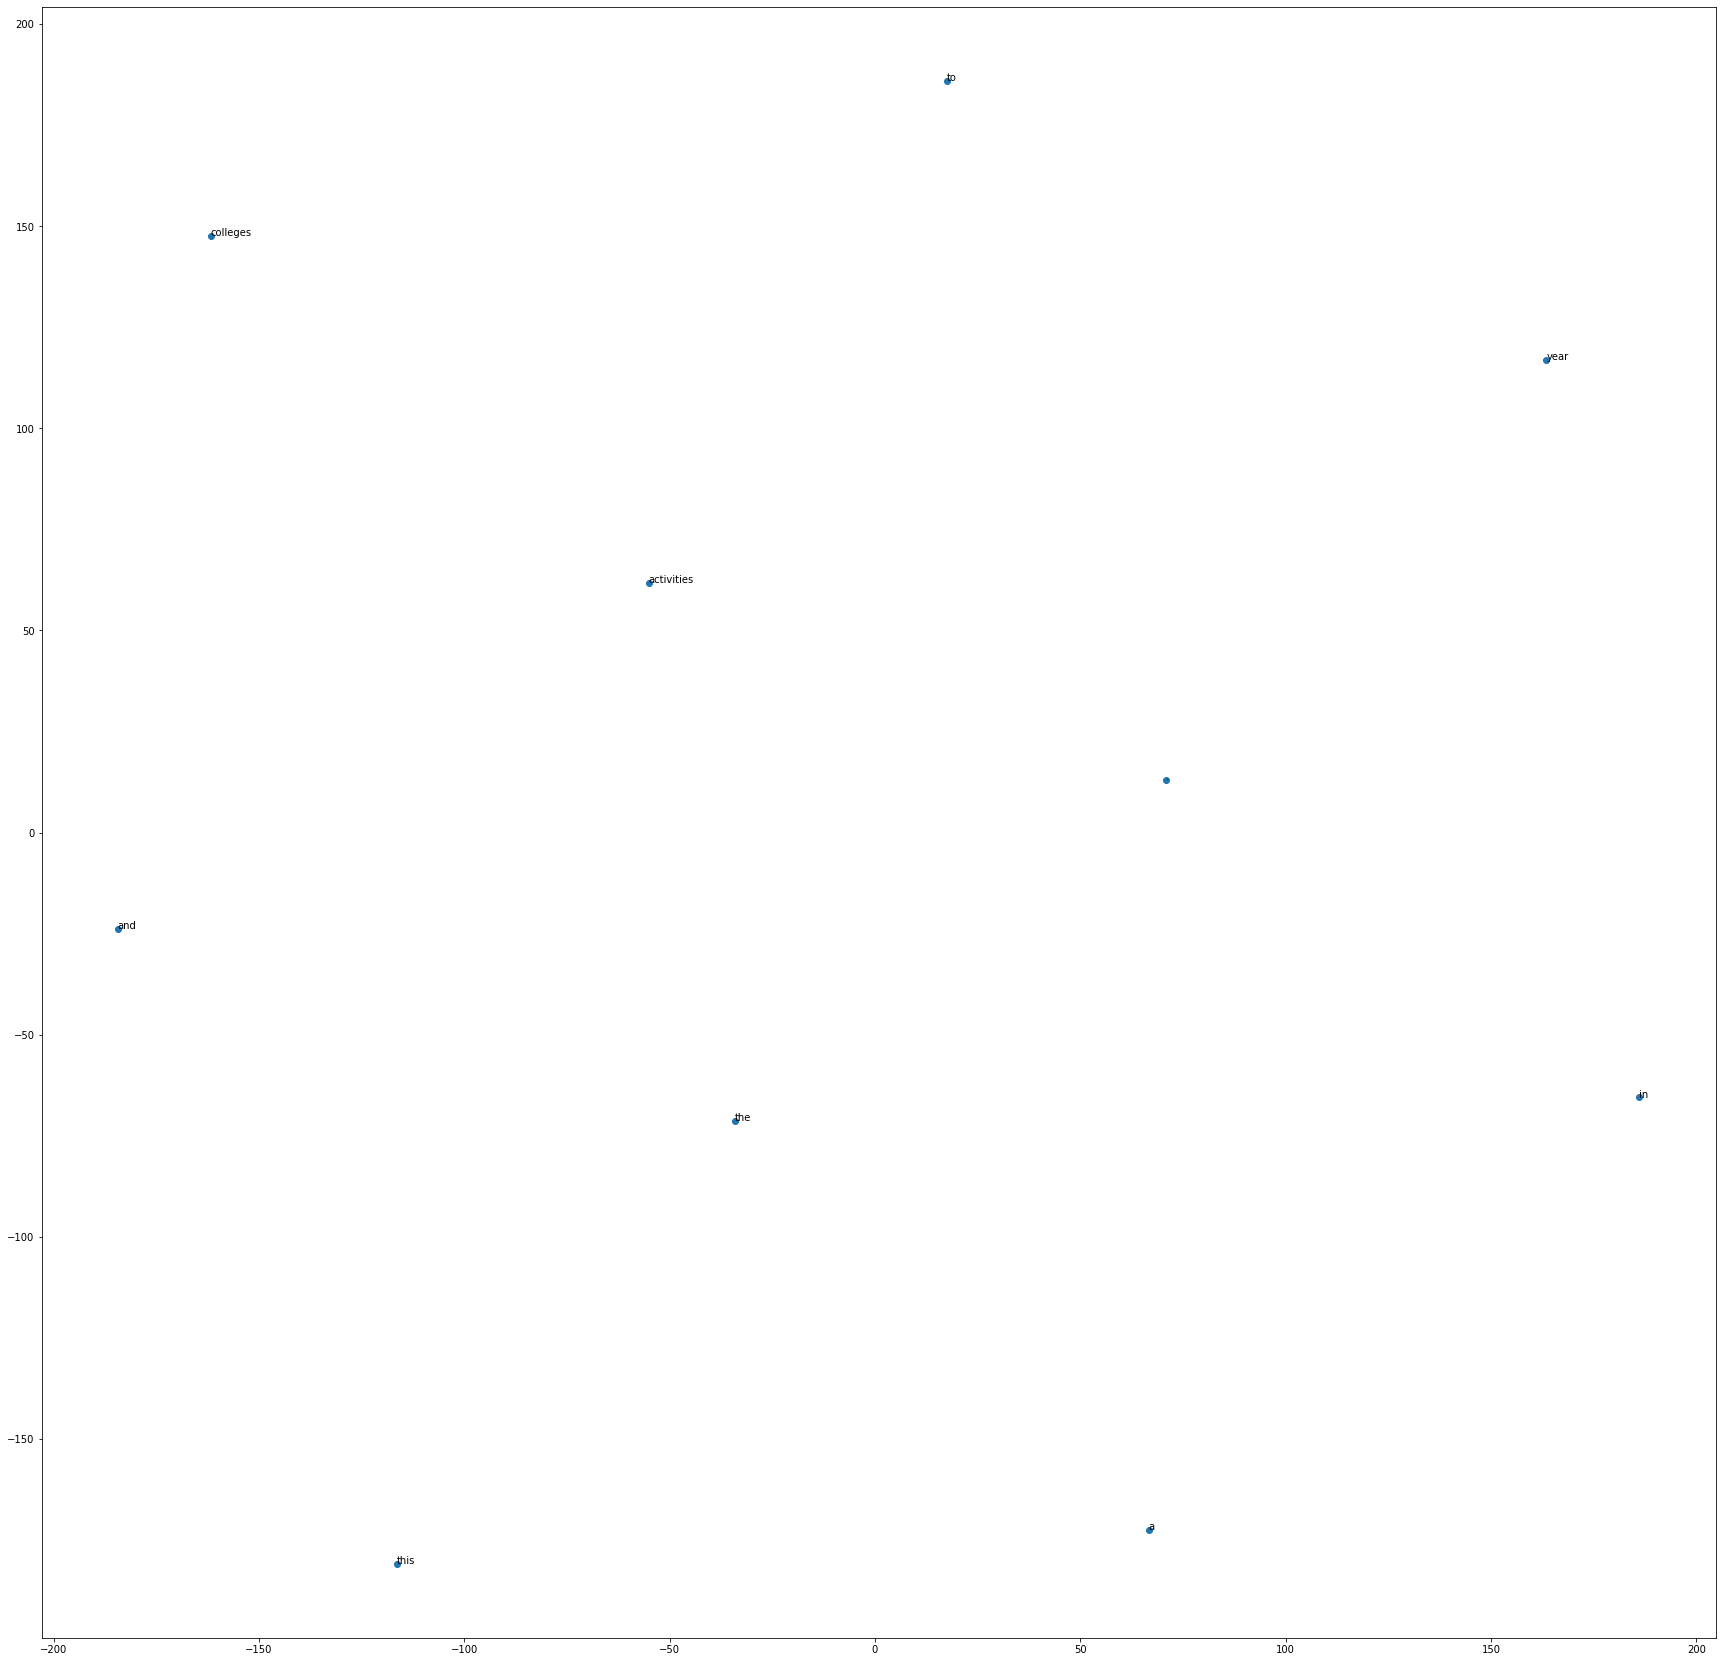

In [164]:
target_word = "braude"
selected_words = [w[0] for w in model2.wv.most_similar(positive=[target_word], topn=10)]
embeddings = [model2.wv[w] for w in selected_words]

mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)
plt.figure(figsize=(30,30))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y)

for i, txt in enumerate(selected_words):
    plt.annotate(txt, (x[i], y[i]))